# Prøve-eksamen i Fys1120 H2022 - eksempeloppgave 2

Dette oppgavesettet tilsvarer en av to oppgaver som dere vil få til eksamen. (Denne oppgaven er stor, så den andre oppgaven vil være mindre). Hver oppgave på eksamen vil bestå av en Jupyter-notebook som dette. Dere arbeider med oppgaven i notebook'en og leverer notebook'en som en pdf file ved å lagre notebook'en og så laste den opp i inspera.

Dere vil kunne får både teori-oppgaver, programmerings-oppgaver og diskusjons-oppgaver som del av eksamen. Alle svarene skal dere skrive i den samme notebook'en.

## Magnetisk felt rundt en magnetisk dipol

Vi skal i denne oppgaven studere det magnetiske feltet rundt en magnetisk dipol i form av en sirkulær krets med en strøm $I$ og radius $a$ som ligger i $xy$-planet med sentrum i origo.

### Oppgave (a)
Vis at det magnetiske feltet $\vec{B}(x,0,0)$ rundt en uendelig lang ledning langs $y$-aksen med en strøm $I$ er gitt som
$$\vec{B}(x,0,0) = \frac{\mu_0 I}{2 \pi x}\left( -\hat{z}\right)$$

(*Løsning*)
Vi ser at pga symmetri vil det magnetiske feltet ikke ha noen komponent langs $y$-aksen og det vil kun kunne avhenge av avstanden $r$ til $y$-aksen. Det magnetiske feltet vil ikke kunne ha noen radiell komponent fordi netto fluks ut av en lukket sylinderoverflate rundt $y$-aksen må være null.

Vi anvender Amperes lov med en Ampere-løkke rundt $y$-aksen med radius $r$. Da er netto strøm gjennom løkken $I$ og Amperes lov gir
$$\oint \vec{B} \cdot d \vec{l} = 2 \pi r B_\phi = \mu_0 I $$
slik at
$$B_\phi = \frac{\mu_0 I}{2 \pi r} $$
og dermed er
$$B_z(x,0,0) = -\frac{\mu_0 I}{2 \pi x}$$
hvor også fortegnet blir riktig.

### Eksempel
Som hjelp til å løse oppgaven nedenfor kan du ta utgangspunkt i dette eksempelet.

Bidraget til det magnetiske feltet fra en strøm $I$ gjennom et linjestykke langs $y$-aksen fra $y=-a/2$ til $y = a/2$ kan finnes og visualiseres i $xz$-planet ved hjelp av følgende program.

In [ ]:
# Svar her

In [9]:
# Løsning
# Vi finner magnetfeltet fra et linjestykke fra l0 til l1
import numpy as np
import matplotlib.pyplot as plt
def Bline(r,l0,l1,I,Nl):
    mu0 = 1.257e-6
    K = mu0/(4*np.pi)
    B = np.array([0,0,0])
    dr = (l1-l0)/Nl
    for j in range(Nl):
        rj = j*dr
        Idl = I*dr
        R = r - rj
        dB = K*np.cross(Idl,R)/np.linalg.norm(R)**3
        B = B + dB
    return B
def findBfield_line(x0,x1,z0,z1,Nx,Nz,I,l0,l1,Nl): 
    x = np.linspace(x0,x1,Nx)
    z = np.linspace(z0,z1,Nz)
    rx,rz = np.meshgrid(x,z)
    Bx = np.zeros((Nx,Nz),float)
    Bz = np.zeros((Nx,Nz),float)
    for i in range(len(rx.flat)):
        r = np.array([rx.flat[i],0,rz.flat[i]])
        Bx.flat[i],By,Bz.flat[i] = Bline(r,l0,l1,I,Nl) 
    return x,z,rx,rz,Bx,Bz

In [11]:
a = 0.1 # Lengde av ledning (m)
l0 = np.array([0,-a/2,0])
l1 = np.array([0,a/2,0])
I = 1.0 # Strøm (A)
Nl = 100 # Antall elementer i linjestykke
#
x,z,rx,rz,Bx,Bz = findBfield_line(-1.0*a,1.0*a,-1.0*a,1.0*a,30,30,I,l0,l1,Nl)

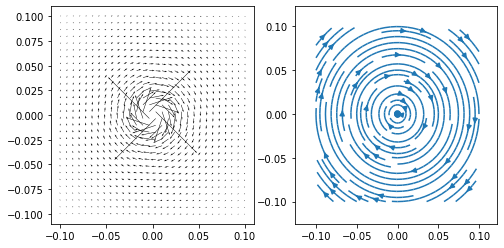

In [14]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.quiver(rx,rz,Bx,Bz)
plt.subplot(1,2,2)
plt.streamplot(rx,rz,Bx,Bz)

### Oppgave (b)
Skriv et program som finner det magnetiske feltet fra en sirkelformet krets med en strøm $I$ som har en radius $a$ og ligger i $xy$-planet med sentrum i origo. Visualiser det magnetiske feltet i $xz$-planet både i et området rundt origo og i et område rundt $(a,0,0)$. Velg et utsnitt som du anser som passende.

In [ ]:
# Svar

In [5]:
# Løsning
import numpy as np
import matplotlib.pyplot as plt
def Bcircle(r,a,I,N):
    mu0 = 1.257e-6
    K = mu0/(4*np.pi)
    B = np.array([0,0,0])
    Idl = I*a*2*np.pi/N
    for j in range(N):
        theta = (j/N)*2*np.pi
        rj = np.array([a*np.cos(theta),a*np.sin(theta),0])
        dlvec = np.array([-np.sin(theta),np.cos(theta),0])
        R = r-rj
        dB = K*Idl*np.cross(dlvec,R)/np.linalg.norm(R)**3
        B = B + dB
    return B
def findBfield_circle(x0,x1,z0,z1,Nx,Nz,I,a,N): 
    x = np.linspace(x0,x1,Nx)
    z = np.linspace(z0,z1,Nz)
    rx,rz = np.meshgrid(x,z)
    Bx = np.zeros((Nx,Nz),float)
    Bz = np.zeros((Nx,Nz),float)
    for i in range(len(rx.flat)):
        r = np.array([rx.flat[i],0,rz.flat[i]])
        Bx.flat[i],By,Bz.flat[i] = Bcircle(r,a,I,N) 
    return x,z,rx,rz,Bx,Bz

In [21]:
# Utregning og visualisinger av område rundt origo
a = 0.1 # Radius til sirkel (m)
I = 1.0 # Strøm i sirkel (A)
Nl = 100 # Antall elementer i sirkel
x,z,rx,rz,Bx,Bz = findBfield_circle(-2*a,2*a,-2*a,2*a,30,30,I,a,Nl)

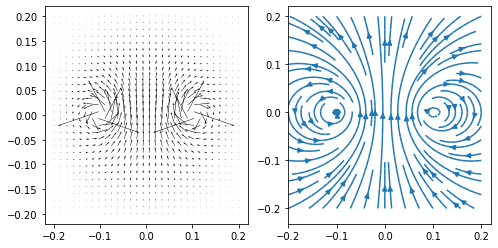

In [22]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.quiver(rx,rz,Bx,Bz)
plt.subplot(1,2,2)
plt.streamplot(rx,rz,Bx,Bz)

In [23]:
# Utregning og visualisinger av område rundt (0,a,0)
a = 0.1 # Radius til sirkel (m)
I = 1.0 # Strøm i sirkel (A)
Nl = 100 # Antall elementer i sirkel
x,z,rx,rz,Bx,Bz = findBfield_circle(0,2*a,-a,a,30,30,I,a,Nl)

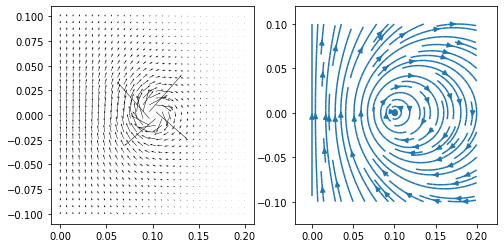

In [24]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.quiver(rx,rz,Bx,Bz)
plt.subplot(1,2,2)
plt.streamplot(rx,rz,Bx,Bz)

### Oppgave (c)
Sammenlikn det magnetiske feltet fra den sirkulære kretsen med resultatet for den uendelig lange lederen i oppgave (a) langs $x$-aksen. Velg selv passende områder for sammenlikningen slik at forskjellige elementer i den fysiske oppførselen til systemet kommer fram. Kommenter resultatene.

(*Svar her*)

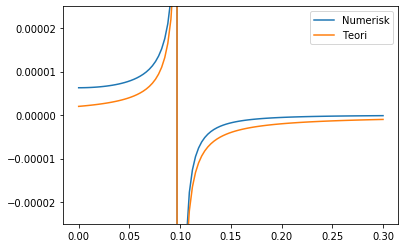

In [45]:
# Resultat fra programmet
x = np.linspace(0.0*a,3*a,100)
zi = 0
yi = 0
Nl = 100
a = 0.1
I = 1.0
mu0 = 1.257e-6
Bi = x.copy()
for ix in range(len(x)):
    xi = x[ix]
    r = np.array([xi,yi,zi])
    Bxi,Byi,Bzi = Bcircle(r,a,I,Nl)
    Bi[ix] = Bzi
plt.plot(x,Bi,label='Numerisk')
# Teoretisk resultat
B_teori = -I*mu0/(2*np.pi*(x-a))
plt.plot(x,B_teori,label='Teori')
plt.ylim([-0.000025,0.000025])
plt.legend()

(*Løsning kommentar*) Vi ser at forskjellen mellom de to løsningene øker inn mot midten, slik vi forventer fordi det er i midten av ringen effekten av at det er en ring med strøm og ikke en linje med strøm blir størst. På utsiden av ringen forventer vi at det ikke er så stor forskjell nær ringen. 

Lengre vekk forventer vi at forskjellen mellom de løsningene blir betydelig. Vi sjekker det ved å lage et plot for store $x$.

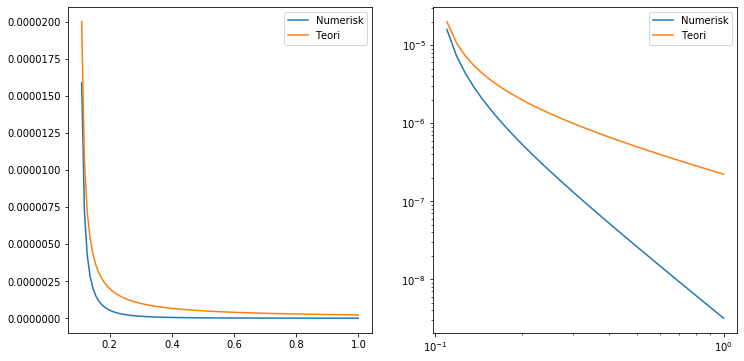

In [49]:
# Resultat fra programmet
x = np.linspace(a*1.1,10*a,100)
zi = 0
yi = 0
Nl = 100
a = 0.1
I = 1.0
Bi = x.copy()
for ix in range(len(x)):
    xi = x[ix]
    r = np.array([xi,yi,zi])
    Bxi,Byi,Bzi = Bcircle(r,a,I,Nl)
    Bi[ix] = Bzi
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(x,-Bi,label='Numerisk')
# Teoretisk resultat
B_teori = -I*mu0/(2*np.pi*(x-a))
plt.plot(x,-B_teori,label='Teori')
#plt.ylim([-0.000025,0.000025])
plt.legend()
plt.subplot(1,2,2)
plt.loglog(x,-Bi,label='Numerisk')
# Teoretisk resultat
B_teori = -I*mu0/(2*np.pi*(x-a))
plt.loglog(x,-B_teori,label='Teori')
#plt.ylim([-0.000025,0.000025])
plt.legend()

Vi ser at det er vanskelig å se denne forskjellen fra et plot med lineære akser, mens forskjellen er veldig tydelig når vi plotter med logaritmiske akser.

Vi forventer denne forskjellen i oppførsel fordi ringen oppfører seg som en dipol, og derfor vil feltet avta som $1/x^3$, mens feltet i den teoretiske modellen avtar som $1/x$. Det er denne forskjellen vi ser i log-log plottet.

*Kommentar som går ut over det vi forventer av svar på oppgaven* 
Vi ville fått et bedre plot om vi i stedet hadde plottet $x-a$ langs $x$-aksen, slik vi gjør i følgende plot:

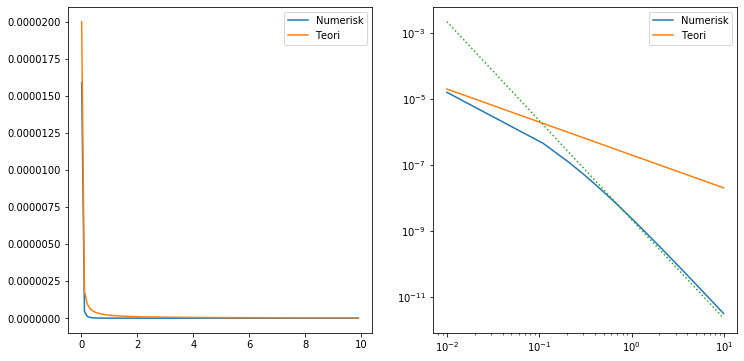

In [15]:
# Resultat fra programmet
import numpy as np
import matplotlib.pyplot as plt
zi = 0
yi = 0
Nl = 100
a = 0.1
I = 1.0
mu0 = 1.257e-6
x = np.linspace(a*1.1,100*a,100)
Bi = x.copy()
for ix in range(len(x)):
    xi = x[ix]
    r = np.array([xi,yi,zi])
    Bxi,Byi,Bzi = Bcircle(r,a,I,Nl)
    Bi[ix] = Bzi
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(x-a,-Bi,label='Numerisk')
# Teoretisk resultat
B_teori = -I*mu0/(2*np.pi*(x-a))
plt.plot(x-a,-B_teori,label='Teori')
#plt.ylim([-0.000025,0.000025])
plt.legend()
plt.subplot(1,2,2)
plt.loglog(x-a,-Bi,label='Numerisk')
# Teoretisk resultat
B_teori = -I*mu0/(2*np.pi*(x-a))
plt.loglog(x-a,-B_teori,label='Teori')
#plt.ylim([-0.000025,0.000025])
plt.legend()
# Vi sammenlikner med 1/x^3
plt.loglog(x-a,2.2e-9/(x-a)**3,':')